In [1]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


In [2]:
iris = load_iris()
X = iris.data
y = iris.target

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## XGBoost

In [4]:
xgb_model = xgb.XGBClassifier(objective="multi:softmax", num_class=3, random_state=42)


In [5]:
xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_class=3,
              num_parallel_tree=None, objective='multi:softmax', ...)

In [6]:
# Make predictions on the test set
y_pred = xgb_model.predict(X_test)


In [7]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


Accuracy: 100.00%


#### Weight-based feature importance:

In [8]:
print(xgb_model.feature_importances_)


[0.0110771  0.02904884 0.75245064 0.20742337]


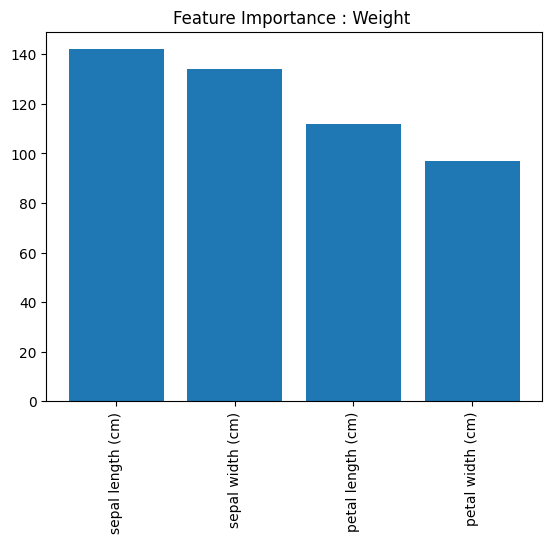

In [9]:
importance = xgb_model.get_booster().get_score(importance_type="weight")
importance = sorted(importance.items(), key=lambda x: x[1], reverse=True)

plt.bar(iris.feature_names, [i[1] for i in importance])
plt.xticks(rotation=90)
plt.title("Feature Importance : Weight ")
plt.show()

#### Gain-based feature importance:

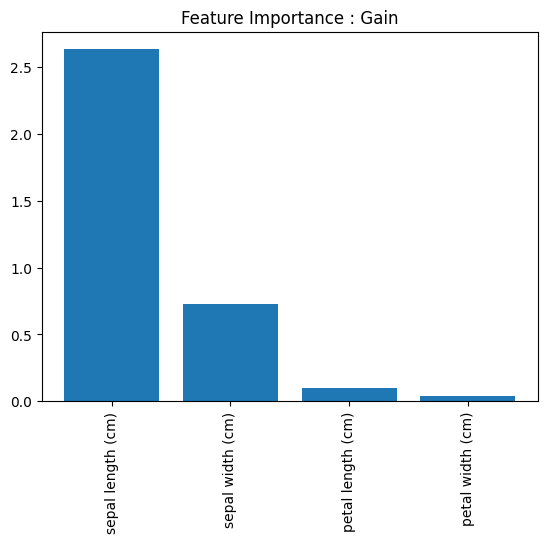

In [10]:
importance = xgb_model.get_booster().get_score(importance_type="gain")
importance = sorted(importance.items(), key=lambda x: x[1], reverse=True)

plt.bar(iris.feature_names, [i[1] for i in importance])
plt.xticks(rotation=90)
plt.title("Feature Importance : Gain")
plt.show()

#### Cover-based feature importance:

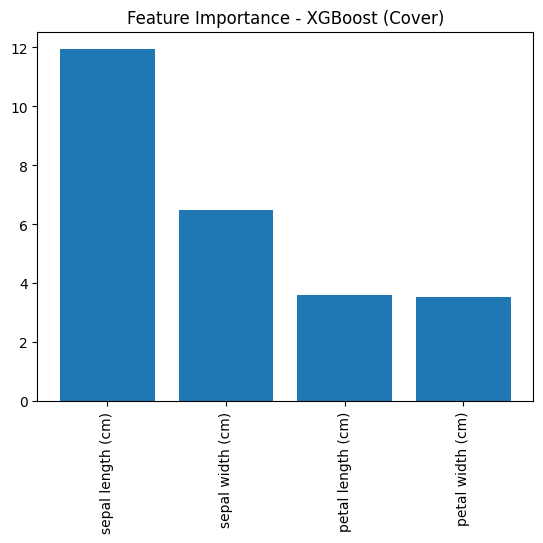

In [11]:
importance = xgb_model.get_booster().get_score(importance_type="cover")
importance = sorted(importance.items(), key=lambda x: x[1], reverse=True)

plt.bar(iris.feature_names, [i[1] for i in importance])
plt.xticks(rotation=90)
plt.title("Feature Importance - XGBoost (Cover)")
plt.show()

## Random Forest

In [12]:
# Créer le modèle
rf = RandomForestClassifier(n_estimators=100, random_state=42)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [13]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [14]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Afficher l'importance de chaque caractéristique
for f in range(X.shape[1]):
    print("%d. Caractéristique %d (%f)" % (f + 1, indices[f], importances[indices[f]]))


1. Caractéristique 2 (0.439994)
2. Caractéristique 3 (0.421522)
3. Caractéristique 0 (0.108098)
4. Caractéristique 1 (0.030387)


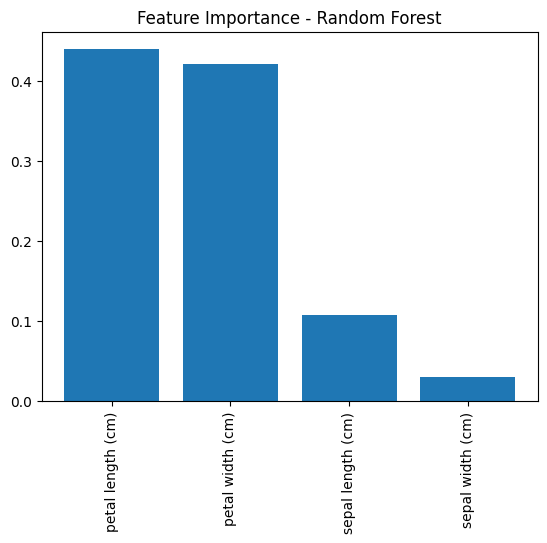

In [15]:
importance = rf.feature_importances_
indices = sorted(range(len(importance)), key=lambda i: importance[i], reverse=True)

plt.bar([iris.feature_names[i] for i in indices], [importance[i] for i in indices])
plt.xticks(rotation=90)
plt.title("Feature Importance - Random Forest")
plt.show()

1. Caractéristique 2 (0.439994)
2. Caractéristique 3 (0.421522)
3. Caractéristique 0 (0.108098)
4. Caractéristique 1 (0.030387)


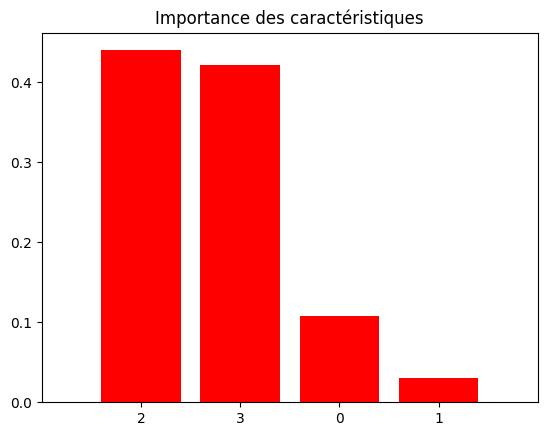

In [16]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Afficher l'importance de chaque caractéristique
for f in range(X.shape[1]):
    print("%d. Caractéristique %d (%f)" % (f + 1,indices[f], importances[indices[f]]))

# Visualisation de l'importance des caractéristiques
plt.figure()
plt.title("Importance des caractéristiques")
plt.bar(range(X.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()


In [17]:
import shap

In [53]:
!pip install shap

     ------------------------------------ 435.6/435.6 kB 461.3 kB/s eta 0:00:00
     -------------------------------------- 14.0/14.0 MB 339.1 kB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.2
    Uninstalling numpy-1.24.2:
      Successfully uninstalled numpy-1.24.2


ERROR: Could not install packages due to an OSError: [WinError 5] Accès refusé: 'C:\\Users\\Xps\\AppData\\Roaming\\Python\\Python39\\site-packages\\~umpy\\.libs\\libopenblas64__v0.3.21-gcc_10_3_0.dll'
Consider using the `--user` option or check the permissions.


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


### SHAP

In [2]:
import shap

# Charger l'ensemble de données iris
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target


### je vais réentrainer les modeles mais cette fois ci, X est une data 

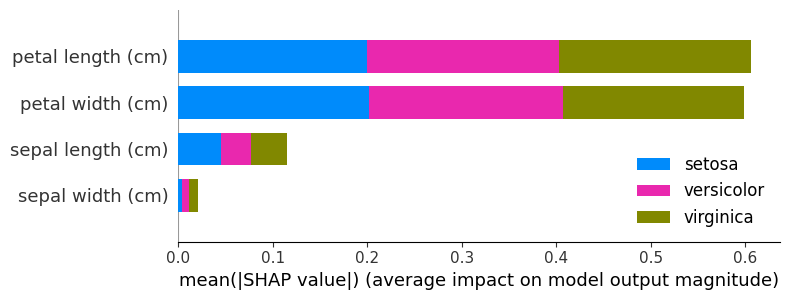

In [6]:
# ReCréer un modèle Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# Initialiser l'explainer SHAP pour le modèle Random Forest
explainer = shap.TreeExplainer(rf_model)

# Calculer les SHAP values pour chaque observation
shap_values = explainer.shap_values(X)

# Visualiser les barplots cumulés pour chaque valeur de y
shap.summary_plot(shap_values, X, plot_type="bar", class_names=iris.target_names)


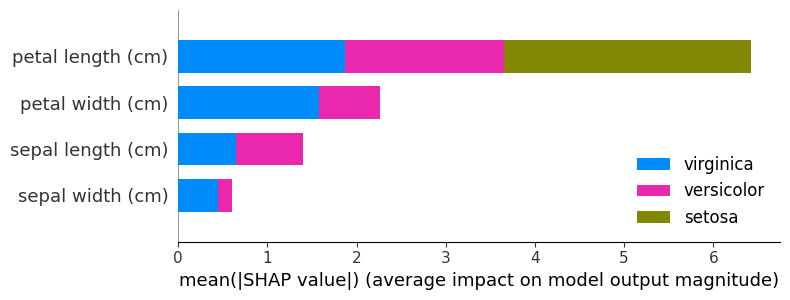

In [5]:
# ReCréer un modèle XGBoost
xgb_model = xgb.XGBClassifier(objective="multi:softmax", random_state=42)
xgb_model.fit(X, y)

# Initialiser l'explainer SHAP pour le modèle XGBoost
explainer = shap.TreeExplainer(xgb_model)

# Calculer les SHAP values pour chaque observation
shap_values = explainer.shap_values(X)

# Visualiser les barplots cumulés pour chaque valeur de y
shap.summary_plot(shap_values, X, plot_type="bar", class_names=iris.target_names)
